# Assignment 4: Gendered Directions in Embeddings

*version 2021.1, details/bugs might be fixed within the first week of publication, you will be notified if this happens*

Most of those interested in computational linguistics have probably read about model bias. What is often less clear is what this means in terms of data and models. In this assignment, you will reproduce results from a famous paper on the technical side of this problem. The discussion on if bias has real-world implications and the details of the meaning of the word "bias" will be picked up again later.

The following will be based on the paper *Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings*. In this paper, the authors start by finding word analogies and investigate semantic closeness. Your task is to reproduce some of this. You are given code for the analysis, but an analyzer class is up to you to implement.


## Submission
 
Please submit your code as a notebook through studium. You should include the following:
 
1. A working implementation of your analyzer, with the given code cells untouched or with added experiments, reproducing your principal results when run. Please ensure that outputs are stored in the notebook (preferably by rerunning your notebook as the last thing you do before submitting).
2. Comment *your* code properly, especially for longer or opaque functionality. Please try to write self documenting code (e.g. by choosing descriptive variable names, refactoring to isolate functionality, and by minimizing code duplication).
4. Comments on what you thought was hard in the assignment, what you think was educational, what took most time, and which parts might be unnecessarily tricky.
5. As the submission is anonymous, **all personal information must be removed**.
6. Apart from sections and titles, please remove all unnecessary text and code from the notebook you hand in. Keep only that which strengthens the case for you having fulfilled the listed requirements.


## Requirements for grade G

To achieve a pass (G) on this assignment, you must finish the `analyzer` class without serious errors.


### Additional requirements for grade VG

For a pass with distinction grade (VG), you should *try to* extend your analysis to another language. The experiments should not be as thorough, and can be limited to finding a smaller set of professions and directional pairs. As the course is given in English, you can not (for legal reasons) be required to know any other languages. However, you can use the dictionaries from [MUSE](https://github.com/facebookresearch/MUSE#ground-truth-bilingual-dictionaries) (or other source) to find rough translations.

The embeddings loaded by the data loader are aligned as described in Joulin et al. (2018). This means that the word vectors can be used for translations using nearest neighbours. Also, the vectors can be run through PCA and the closeness of words can be visualized.

In addition to your notebook, please submit 1-3 slides with a short manuscript (< 500 words) presenting your results.


### Plagiarism
 
In code assignments, plagiarism is a tricky concept. A clean cut way would be to demand that you write all the code yourself, from memory, with only the assigned literature as help. This is not how code is developed professionally. It is common to copy and share. However, since this is a learning exercise, you must implement everything on your own, but please look at the course repo, Stack Overflow etc. Moreover, discuss with course mates and TAs to find inspiration and solutions. Code that is *obviously* copied (with minor modifications) will be considered as plagiarized. As a part of the examination, you might be asked to explain any particular part of the functionality in your implementation.


### References

Bolukbasi et al., (2016) "[*Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings*](https://arxiv.org/pdf/1607.06520.pdf)," arXiv

Joulin et al. (2018) "[*Loss in Translation: Learning Bilingual Word Mapping with a Retrieval Criterion*](https://arxiv.org/abs/1804.07745)," arXiv


## Data Loader

To reduce loading time when re-instantiating the analyzer, the embedding data loader is a separate class. After a fasttext embedding has been downloaded, it will be cached on the local file system to reduce reloading time.

The version of the fasttext embedding being downloaded is *aligned* in that the embeddings of several languages have been put on top of each other. As such, the word for 'cat' in the English embedding will be close to the word 'katt' (Swedish) and 'gato' (Spanish) in their respective embeddings. You choose the language to load by giving the loader a language code.

In [ ]:
import numpy as np
from urllib.request import urlopen
from tqdm import tqdm
import os.path
import time

class AlignedEmbeddingLoader(object):
  """This data loader will download an aligned fasttext embedding given a two letter language code.
  More information ca be found at https://fasttext.cc/docs/en/aligned-vectors.html ."""
  def __init__(self, lang='en'):
    """Data loader"""
    self._dataurl = "https://dl.fbaipublicfiles.com/fasttext/vectors-aligned/wiki.%s.align.vec" % lang
    cachefile = "cache_%s.npz" % lang
    if os.path.exists(cachefile):
      print("Loading cached data...", end="")
      t = time.time()
      data = np.load(cachefile)
      self.idx2token_ = list(data['idx2token'])
      self.vectors_ = data['vectors']
      print("done (%isec)" % (time.time()-t), flush=True)
    else:
      with urlopen(self._dataurl) as remote_file:
        get_decoded_line = lambda file: file.readline().decode('utf-8')
        self.n_tokens, self.n_dim = [int(n) for n in get_decoded_line(remote_file).split()]
        self.idx2token_ = list()
        self.vectors_ = np.zeros((self.n_tokens, self.n_dim), dtype=np.float32)
        for n in tqdm(range(self.vectors_.shape[0]), desc="Downloading and parsing vectors"):
          textline = get_decoded_line(remote_file)
          linedata = textline.split(' ')
          self.idx2token_.append(linedata[0])
          self.vectors_[n, :] = np.asarray(linedata[1:], dtype=np.float32)
      np.savez(cachefile, vectors=self.vectors_, idx2token=self.idx2token_)
    self.token2idx_ = {token:i for i, token in enumerate(self.idx2token_)}

loaded_embedding = AlignedEmbeddingLoader('en')

!ls -l

Loading cached data...done (105sec)
total 5196212
-rw-r--r-- 1 root root 5320910082 May 20 08:23 cache_en.npz
drwxr-xr-x 1 root root       4096 May  6 13:44 sample_data


## Your analyzer
This is the analyzer. Your task is to finish this in line with the unit tests, the assignment text specifications, and the paper Bolukbasi (2016).

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

class EmbeddingAnalyzer(object):
  def __init__(self, embedding):
    self.vectors_ = embedding.vectors_
    self.token2idx_ = embedding.token2idx_
    self.idx2token_ = embedding.idx2token_

  def __len__(self):
    """Gives the number of tokens in the embedding."""
    pass

  def __getitem__(self, tokens):
    """Returns the vectors for a token or a list of tokens."""
    pass

  def __contains__(self, token):
    """Allows a user query if a tokens is in the embedding."""
    pass

  def projection(self, direction, vectors):
    """The cosine similarity between a reference direction and a matrix of word vectors.
    
    direction:
      A vector
    vectors:
      A row matrix with word vectors"""
    pass

  def simple_analogy(self, pair, query, k=5):
    """Simple/Classic word analogy as: man - woman = king - queen"""
    pass

  def similarity(self, token1, token2):
    """Returns the cosine similarity between two tokens."""
    pass

  def analogies(self, analogy_direction, tokens):
    """The more complex word analogy method"""
    pass

analyzer = EmbeddingAnalyzer(loaded_embedding)

assert 'man' in analyzer
assert 'woman' in analyzer
assert 'kdjfsfhgkdsjfdh' not in analyzer

assert len(analyzer) > 100000

assert type(analyzer['man']) is np.ndarray
assert np.isclose(np.sum(analyzer['man']-analyzer['man']), 0)

## Word similarity

We should be able to meassure similarity as cosine similarity.

$cos(\overrightarrow{cat}, \overrightarrow{dog}) \geq cos(\overrightarrow{cat}, \overrightarrow{cow})$

In [ ]:
assert analyzer.similarity('cat', 'dog') >= analyzer.similarity('cat', 'cow')

## Word analogies

One of the core tasks for showing any semantic properties in an embedding is finding word analogies. We can this of this as word a is to word b, as word c is to word d. Our task is to find word d, knowing a, b, and c.

$\overrightarrow{a} - \overrightarrow{b} \approx \overrightarrow{c} - \overrightarrow{d}$

For gender, this becomes:

$\overrightarrow{man} - \overrightarrow{woman} \approx \overrightarrow{king} - \overrightarrow{x}$

By rearranging we get:

$\overrightarrow{king} - \overrightarrow{man} + \overrightarrow{woman} \approx \overrightarrow{x}$

In [ ]:
best_matches = analyzer.simple_analogy(('man', 'woman'), 'king', k=5)
print("Matches (in order of similarity):")
for i, token in enumerate(best_matches):
  print(i+1, token)

assert 'queen' in analyzer.simple_analogy(('man', 'woman'), 'king', k=5)

Matches (in order of similarity):
1 king
2 queen
3 princess
4 regnant
5 princesses


We can do this for capitols too.

$\overrightarrow{France} - \overrightarrow{Japan} \approx \overrightarrow{Paris} - \overrightarrow{x}$

In [ ]:
best_matches = analyzer.simple_analogy(('france', 'japan'), 'paris', k=5)
print("Matches (in order of similarity):")
for i, token in enumerate(best_matches):
  print(i+1, token)

assert 'tokyo' in analyzer.simple_analogy(('france', 'japan'), 'paris', k=5)

Matches (in order of similarity):
1 tokyo
2 japan
3 osaka
4 kyoto
5 tokyo 


Please try doing this for at least one other famous category (e.g. comparing adjectives).

## Finding the genderedness of professions

Bulokbasi (2016) has a repo for the paper. We can download their data for professions. This allows us to find the genderedness for our embedding and plot against their survey data.

In [ ]:
import json
with urlopen('https://raw.githubusercontent.com/tolga-b/debiaswe/master/data/professions.json') as remote_file:
  professions = {title: {'definitional': defi, 'stereotypical': ster} for title, defi, ster in json.load(remote_file)}
print("Loaded %i professions" % len(professions))

Loaded 320 professions


We want to find the projection of vectors for different profession on a gender direction. This can be done by finding the cosine similarity as:

$cos(\overrightarrow{man} - \overrightarrow{woman}, \overrightarrow{butcher})$

$cos(\overrightarrow{man} - \overrightarrow{woman}, \overrightarrow{ballerina})$

The projection should be non-negative as $|cos(\cdot,\cdot)|$. However, by letting the projection method of the anlayzer give us the ccosine similarity, we can see the direction of the projection by looking at its sign.

In [ ]:
assert type(analyzer[['man', 'woman', 'butcher']]) is np.ndarray
assert analyzer[['man', 'woman', 'butcher']].shape[0] == 3

assert analyzer.projection(analyzer['man']-analyzer['woman'], analyzer['butcher']) > 0
assert analyzer.projection(analyzer['man']-analyzer['woman'], analyzer['ballerina']) < 0

We create a woman-man direction.

In [ ]:
direction = analyzer['man']-analyzer['woman']
titles = [title for title in professions.keys() if title in analyzer]
projection = analyzer.projection(direction, analyzer[titles])

The estimation of the gender direction can be improved by using several pairs. Again, we use the data from Bulokbasi (2016).

In [ ]:
import json
with urlopen('https://raw.githubusercontent.com/tolga-b/debiaswe/master/data/definitional_pairs.json') as remote_file:
  definitional_pairs = [(m, f) for m, f in json.load(remote_file)]
definitional_pairs

[('woman', 'man'),
 ('girl', 'boy'),
 ('she', 'he'),
 ('mother', 'father'),
 ('daughter', 'son'),
 ('gal', 'guy'),
 ('female', 'male'),
 ('her', 'his'),
 ('herself', 'himself'),
 ('Mary', 'John')]

In [ ]:
direction2 = np.zeros(analyzer['man'].shape)
for female, male in definitional_pairs:
  direction2 += analyzer[male.lower()]
  direction2 -= analyzer[female.lower()]

projection2 = analyzer.projection(direction2, analyzer[titles])

We can plot the relation between genderedness in the data and human annotation.

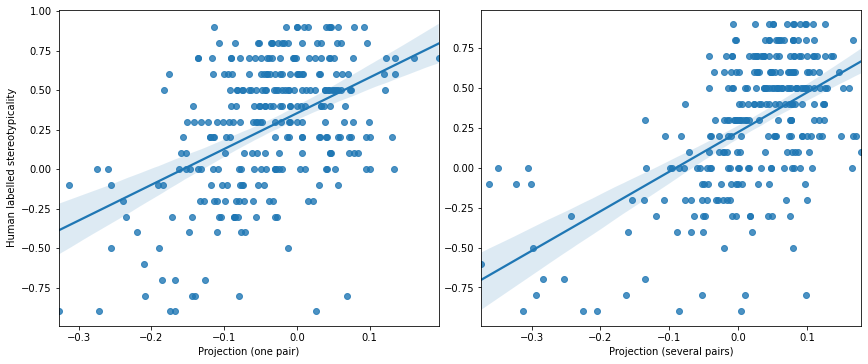

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12, 5))
ax = fig.subplots(1, 2)
stereotypicality = [professions[title]['stereotypical'] for title in titles]
sns.regplot(x=projection, y=stereotypicality, ax=ax[0])
a = sns.regplot(x=projection2, y=stereotypicality, ax=ax[1])
ax[0].set_xlabel("Projection (one pair)")
ax[1].set_xlabel("Projection (several pairs)")
ax[0].set_ylabel("Human labelled stereotypicality")
fig.tight_layout(pad=.5)
fig.show()

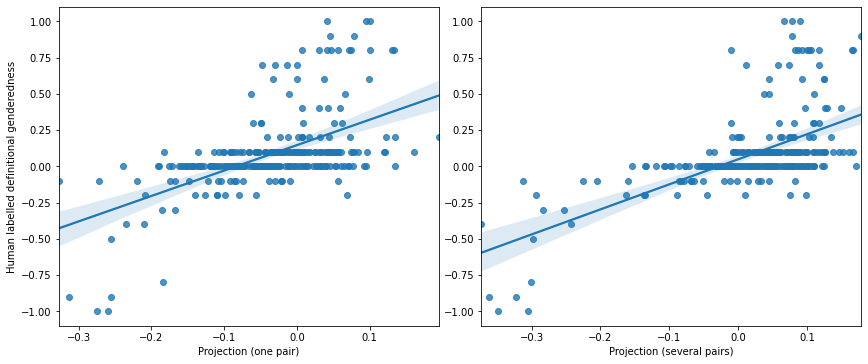

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.subplots(1, 2)
definitionality = [professions[title]['definitional'] for title in titles]
sns.regplot(x=projection, y=definitionality, ax=ax[0])
a = sns.regplot(x=projection2, y=definitionality, ax=ax[1])
ax[0].set_xlabel("Projection (one pair)")
ax[1].set_xlabel("Projection (several pairs)")
ax[0].set_ylabel("Human labelled definitional genderedness")
fig.tight_layout(pad=.5)
fig.show()

## More analogies

The paper defines a more advances procedure for analogies as:

$S_{(a,b)}(x, y) = \left\{\begin{matrix}
cos(\overrightarrow{a}-\overrightarrow{b}, \overrightarrow{x}-\overrightarrow{y}) & \parallel \overrightarrow{x}-\overrightarrow{y} \parallel \leq 1\\ 
0 &  \text{otherwise}
\end{matrix}\right.$

This should return a list of tuples with word pairs.

In [ ]:
assert len(analyzer.analogies(analyzer['man']-analyzer['woman'], ['actor', 'actress'])) == 1
assert type(analyzer.analogies(analyzer['man']-analyzer['woman'], ['actor', 'actress'])) == list
assert type(analyzer.analogies(analyzer['man']-analyzer['woman'], ['actor', 'actress'])[0]) == tuple

analyzer.analogies(analyzer['man']-analyzer['woman'], ['actor', 'actress'])

[('actor', 'actress')]

In [ ]:
analyzer.analogies(analogy_direction=direction2, tokens=titles)

[('accountant', 'businesswoman'),
 ('actor', 'actress'),
 ('actress', 'waitress'),
 ('administrator', 'bureaucrat'),
 ('adventurer', 'protagonist'),
 ('advocate', 'campaigner'),
 ('aide', 'counselor'),
 ('alderman', 'solicitor'),
 ('alter_ego', 'fashion_designer'),
 ('ambassador', 'secretary'),
 ('analyst', 'columnist'),
 ('anthropologist', 'pediatrician'),
 ('archaeologist', 'anthropologist'),
 ('archbishop', 'parishioner'),
 ('architect', 'painter'),
 ('artist', 'singer'),
 ('artiste', 'performer'),
 ('assassin', 'bodyguard'),
 ('astronomer', 'archaeologist'),
 ('athlete', 'swimmer'),
 ('attorney', 'paralegal'),
 ('author', 'novelist'),
 ('ballerina', 'actress'),
 ('banker', 'businesswoman'),
 ('barber', 'hairdresser'),
 ('barrister', 'campaigner'),
 ('bartender', 'waitress'),
 ('biologist', 'pediatrician'),
 ('bishop', 'parishioner'),
 ('bookkeeper', 'waitress'),
 ('boss', 'bartender'),
 ('boxer', 'wrestler'),
 ('broadcaster', 'columnist'),
 ('broker', 'realtor'),
 ('businessman', '